# The Stroop Effect

In this notebook, we perform an statistical test on a [dataset](./data/stroopdata.csv) from Udacity, which contains data of participants involved in a perceptual test. The name of the test is Stroop test and it know percetual phenomenon in human nature called Stroop effect.


## Content

<ul>
<li><a href="#background">Background on Stroop Effect</a></li>
<li><a href="#variables">Variables Identification</a></li>
<li><a href="#hypothesis">Hypothesis</a></li>
<li><a href="#analysis">Data Analysis</a></li>
    <ul>
    <li><a href="#descriptive">Descriptive Statistics</a></li>
    <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#stats_test">Statistical Test</a></li>
    </ul>
<li><a href="#further">Further Investigation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">References</a></li>
</ul>


<a id='background'></a>
## Background on Stroop Effect 


The Stroop effect[[1](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)] is a psycological phenomenon shown in human reaction to relate concepts (words) to vision (images, colors). In order to understand such relation of concepts and images, psycologists test a participant with two lists of words, which display words in different color of ink. The participant's task is to say the color of the ink of the word shown.   

The task has two scenarios with equally-size lists of words: 
1. **Congruent** words:
Shown words are colored matching the colors in which they are displayed. _Example: <font color="red">RED</font>, <font color="blue">BLUE</font>._
<p></p>
2. **Incongruent** words: 
Shown words are colored, but this time the color of words does not match the word. Thus, the name of incongruent. _Example: <font color="orange">PURPLE</font>, <font color="purple">ORANGE</font>._


For each scenario, one measures the time it takes each participant to go through all words. 

It is important to notice that the colored words congruent or incongruent are stimuli, while the participant's response is a reaction.

>**Note:** The dataset in this notebook contains the times of participants taking a Stroop test.


<a id="variables"></a>
## Variables Identification

In order to start working on our statistical test and choose a hypothesis to test for, we need to define the variables we will investigate and wether if they are independent from or dependent to other factors.

Thus, we ask ourselves the questions: What is the independent variable? What is the dependent variable?

To identify our independent and dependent variables we must ask which facts influence the outcome. In this case we know the words and colors are stimuli and the particpant's answer is a reaction. Thus, we can say that the words and its colors influence the reaction of the participant measured in time units. As a result, we can classify our variables as follow:

**Independent variables**
1. Color of word
2. Word
3. Person (Participant)

Basically, independent variables 1 and 2 refer to our **Congruent/Incongruent** words. 

**Dependent variables**
1. Time, the _reaction time_ of a participant

<a id="hypothesis"></a>
## Hypothesis

Once we identified our independent and dependent variables, we want to make a hypothesis on the outcome of our dependent variables which is the result of our test. Thus, we can ask: What is an appropriate set of hypotheses for this task?

For a Stroop test, the reaction time is our tests' result and dependent variable. In fact, that is what we are interested in comparing and the purpose of having 2 scenarios on the test. We want to look at the reaction time of people in both scenarios and make conclusions on participants' reactions. Therefore, we will compare the reaction time of **Congruent** and **Incongruent** scenarios. Since we need a sample size to run to make a hypothesis test, we will need to consider the average of our times congruent and incongruent to be our parameters for the test.

For the hypothesis, the traditional thinking believes that the participants' reaction time is the same or maybe even slower when they have congruent words. However, we want to challenge that idea by saying that we believe the participants' have a faster reaction time when color and words match (congruent) than when color and words do not match (incongruent). Thus, we can stablish a hypothesis as follow:

$$H_0: \mu_0 \geq \mu_1$$
$$H_1: \mu_0 < \mu_1$$

where $\mu_0$ is the mean of the time it took people on the sample to read **congruent** words (labels consistent with color)

and $\mu_1$ is the mean of the time it took people on the sample to read **incongruent** words (labels differ from color)


The main purpose of our hypothesis becomes to answer if we can have enough information to say that _our participants' are faster reacting to congruent words than incongruent words._

<a id='analysis'></a>
## Data Analysis

In this section, we will concentrate on obtaining some statistics of our data and doing some exploration of it. The goal will be to perform the necessary analyses and tests to determine if we reject or show that there is not enough information to reject the null hypothesis $H_0$.

<a id='descriptive'></a>
### Descriptive Statistics

First, we need to understand our data and see what kind of data we have. It is also important to check if we need to clean our dataset or if we were lucky to have gotten one dataset that was preprocessed by someone else and is clean.
Then, we want to verify if our data is close enough to be normally distributed using descriptive statistics such as two central tendency measures (median, mean) and checking for the variability of our data ( we will need to consider the size of the sample to judge this point).

In [46]:
# Packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [44]:
# Loading our dataset
path = "data/"
file = 'stroopdata.csv'
df = pd.read_csv(path+file)
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [45]:
# Display information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


This dataset seems to have been processed by our source. Thus, we will be ok to use it as it is. There is also something important on this dataset and that is the size of it. It seems a fairly small dataset of 24 samples per group (congruent and incongruent) to have a 100% accurate decision when determining if the data is normally distributed, but if the distributions get close to normal we can agree that it is close enough even with this little data.

We can start by calculating the median and mean and see how far apart they are in each group

In [56]:
# Checking the mean and median for both groups
print('Congruent Mean: {:.4f}\nCongruent Median: {:.4f}'.
      format(df['Congruent'].mean(),df['Congruent'].median()))

print('\nIncongruent Mean: {:.4f}\nIncongruent Median: {:.4f}'.
      format(df['Incongruent'].mean(),df['Incongruent'].median()))

Congruent Mean: 14.0511
Congruent Median: 14.3565

Incongruent Mean: 22.0159
Incongruent Median: 21.0175


Right away we can notice the median and the mean for both groups is very close to each other. Thus, we can say our data is close to a normal distribution. It will be good to check the 25% and 75% percentiles, minimum and maximum values to understand a little bit better our data. 

In [62]:
# Checking the 25% and 75% percentiles, min and max values for both groups
p25_congruent = np.percentile(df['Congruent'],25)
p75_congruent = np.percentile(df['Congruent'],75)
print('Congruent [25%,75%] percentiles: [{:.4f},{:.4f}]'.format(p25_congruent,p75_congruent))
print('Congruent (min,max): ({:.4f},{:.4f})'.format(df['Congruent'].min(), df['Congruent'].max()))

p25_incongruent = np.percentile(df['Incongruent'],25)
p75_incongruent = np.percentile(df['Incongruent'],75)
print('\nIncongruent [25%,75%] percentiles: [{:.4f},{:.4f}]'.format(p25_incongruent,p75_incongruent))
print('Incongruent (min,max): ({:.4f},{:.4f})'.format(df['Incongruent'].min(), df['Incongruent'].max()))

Congruent [25%,75%] percentiles: [11.8953,16.2007]
Congruent (min,max): (8.6300,22.3280)

Incongruent [25%,75%] percentiles: [18.7168,24.0515]
Incongruent (min,max): (15.6870,35.2550)


This data corroborates our assumption that the **congruent** group's distribution is normal as we can clearly see now that the mean and median are sitting in between the 25% and 75% percentiles. However, there is something suspicious about our **incongruent** group's distribution, apparently the mean is leaning to the 75% percentile, while the median seems centered in the between the 25% and 75% percentile. Our _incongruent data seems skewed to the right_ as $mean > median$. This might be caused by outliers since the maximum value is further away form the 75% than the minimum value from the 25% percentile. We will explore this later in a graph to make this concept clearer, but as the variance and standard deviation of both groups can tell us their variability (spread).

In [59]:
# Checking the var and STD for both groups
print('Congruent Variance: {:.4f}\nCongruent Std: {:.4f}'.
      format(df['Congruent'].var(),df['Congruent'].std()))

print('\nIncongruent Variance: {:.4f}\nIncongruent Std: {:.4f}'.
      format(df['Incongruent'].var(),df['Incongruent'].std()))

Congruent Variance: 12.6690
Congruent Std: 3.5594

Incongruent Variance: 23.0118
Incongruent Std: 4.7971


As we expected, the **incongruent** group has a high variance and standard deviation as we believe it contains outliers that contribute to the increase in variability. The next step will be to perform an exploratory data analysis to visualize our believes.

<a id="eda"></a>
### Exploratory Data Analysis (EDA)

The first thing we want to confirm is that the dataset has a normal distribution as ou descriptive statistics tells us we might have normal distributions, but also outliers in our incongruent group.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

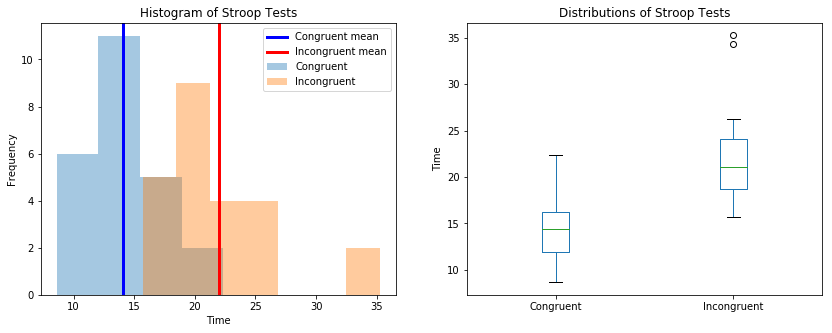

In [96]:
# Histogram and box plot of both groups
plt.figure(figsize=(14,5))

# Histogram
plt.subplot(1,2,1)
sns.distplot(df["Congruent"], norm_hist=False,kde=False, bins=4, label = "Congruent")
sns.distplot(df["Incongruent"], norm_hist=False,kde=False,  bins=7, label = "Incongruent")
plt.axvline(df['Congruent'].mean(),color='b',lw=3,label='Congruent mean')
plt.axvline(df['Incongruent'].mean(),color='r',lw=3,label='Incongruent mean')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Stroop Tests')
plt.legend()

# Box plot
subplot_box =plt.subplot(1,2,2) # position of subplot
df.plot(ax=subplot_box, kind='box')
plt.title('Distributions of Stroop Tests')
plt.ylabel('Time');


The histogram and boxplot clearly show the incongruent group has two outliers that are shifting the mean to the right skewing the distribution to the right. The boxplot also shows that most of the samples in the incongruent group actually live between the 25% and 75% percentile, which is a good indication that the distribution is normal.
The congruent group on the other hand has its mean centered on the highest frequency of the histogram which is as close as the mode and median it can get to indicate a normal distribution. On the box plot, however, we can notice the spread between the minimum and maximum values in the congruent group is larger than the incongruent group. This was not expected as our variance for the congruent group was smaller, but this might be an indicative that if we remove the ouliers from the incongruent group (consecuentively from the congruent group as well) we should find a smaller variance for the incongruent distribution.

However, while removing outliers in one group, we might find there will be an outlier for the other group. This all will depend on our metric to remove outliers. In here, we will consider the boxplot out tool to determine of something is an outlier.

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288
10,22.328,24.524


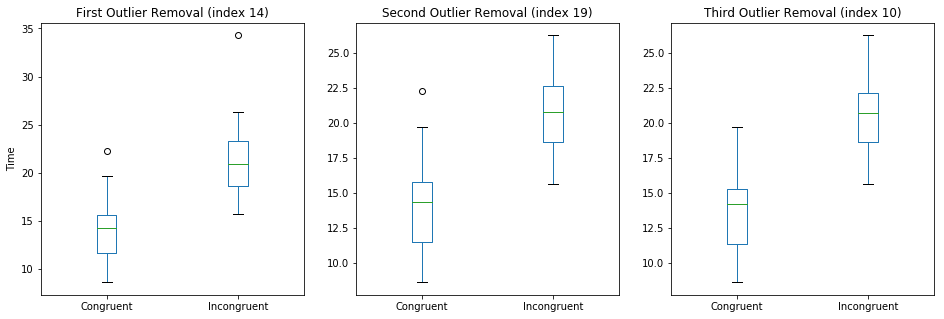

In [112]:
# Removing outliers
plt.figure(figsize=(16,5))

# creating a copy of our dataset in which outliers will be removed
df_clean = df.copy()

# Removing first outlier
sub1 = plt.subplot(1,3,1)
outlier1 = df_clean['Incongruent'].argmax()
df_clean = df_clean.drop([outlier1])
df_clean.plot(ax=sub1, kind='box')
plt.ylabel('Time')
plt.title('First Outlier Removal (index 14)')

# Removing second outlier
sub2 = plt.subplot(1,3,2)
outlier2 = df_clean['Incongruent'].argmax()
df_clean = df_clean.drop([outlier2])
df_clean.plot(ax=sub2, kind='box')
plt.title('Second Outlier Removal (index 19)')

#Removing third outlier (surprisingly found in congruent)
sub3 = plt.subplot(1,3,3)
outlier3 = df_clean['Congruent'].argmax()
df_clean = df_clean.drop([outlier3])
df_clean.plot(ax=sub3, kind='box')
plt.title('Third Outlier Removal (index 10)');

# Displaying the outliers' values
df.loc[[outlier1,outlier2,outlier3]]

From the boxplots we could see that when removing the first outlier, we were found that the congruent group had an outlier. Thus, the removal of two outliers became a task of removing three outliers. The process illustrated above left us with 21 samples. 
Moreover, we now can say that the incongruent group is actually closer to a normal distribution than the congruent group. This will be reflected in our descriptive statistics. 


In [137]:
# Checking the mean, median and standard deviation for both groups
print('Congruent Mean: {:.4f}\nCongruent Median: {:.4f}\nCongruent Std: {:.4f}'.
      format(df_clean['Congruent'].mean(),df_clean['Congruent'].median(), df_clean['Congruent'].std()))

print('\nIncongruent Mean: {:.4f}\nIncongruent Median: {:.4f}\nIncongruent Std: {:.4f}'.
      format(df_clean['Incongruent'].mean(),df_clean['Incongruent'].median(), df_clean['Incongruent'].std()))

Congruent Mean: 13.5395
Congruent Median: 14.2330
Congruent Std: 3.1412

Incongruent Mean: 20.6817
Incongruent Median: 20.7620
Incongruent Std: 2.8259


We can see that the spread (standard deviation) decreased in both groups, which is a good indication that we effectively removed the outliers. The incongruent group in particular got a mean and median almost similar indicating a normal distribution. Moreover, the standard deviation is now smaller than the congruent group which is what we expected to see. However, the congruent group now has a median and mean that are not as close as before. Here we sacrificed the separation in median and mean to gain a tighter distribution by reducing our standard deviation when we removed the congruent outlier.

All in all, we now have a clean dataset which has two distributions closed to normal. This is good enough for us to move onto a hypothesis testing.

<a id="stats_test"></a>
### Statistical Test

For the purpose of testing using simulation (bootstrapping) we will use math to express our hypothesis from :

$$H_0: \mu_0 \geq \mu_1$$
$$H_1: \mu_0 < \mu_1$$

to its equivalent: 

$$H_0: \mu_0 - \mu_1 \geq 0$$
$$H_1: \mu_0 - \mu_1 < 0$$

Given that we already know our distributions are fairly close to normal, we are ready to use the mean as our statistic to perform our hypothesis test.



(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [241]:
# Using bootstraping
RESAMPLE = 10000

congruent = []
incongruent = []
diff = []

for _ in range(RESAMPLE):
    c_mean = df_clean['Congruent'].sample(7,replace=True).mean()
    congruent.append(c_mean)
    i_mean = df_clean['Incongruent'].sample(7,replace=True).mean()
    incongruent.append(i_mean)
    diff.append(c_mean - i_mean)

    
congruent = np.array(congruent)
incongruent = np.array(incongruent)
diff = np.array(diff)

print('Congruent mean: {:.4f} Congruent median: {:.4f} Congruent std: {:.4f}'.
      format(congruent.mean(), np.median(congruent), congruent.std()))

print('\nIncongruent mean: {:.4f} Incongruent median: {:.4f} Incongruent std: {:.4f}'.
      format(incongruent.mean(), np.median(incongruent), incongruent.std()))

print('\nDiff mean: {:.4f} Diff median: {:.4f} Diff std: {:.4f}'.
      format(diff.mean(), np.median(diff), diff.std())) 

Congruent mean: 13.5314 Congruent median: 13.5224 Congruent std: 1.1648

Incongruent mean: 20.6870 Incongruent median: 20.6756 Incongruent std: 1.0460

Diff mean: -7.1556 Diff median: -7.1703 Diff std: 1.5616


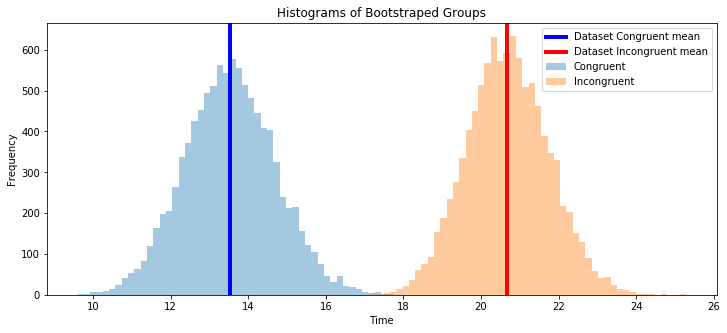

In [242]:
# Histograms of simulated bootstraped groups
plt.figure(figsize=(12,5))
sns.distplot(congruent, kde=False, label='Congruent')
sns.distplot(incongruent, kde=False, label = 'Incongruent')
plt.axvline(df_clean['Congruent'].mean(),color='b',lw=4,label='Dataset Congruent mean')
plt.axvline(df_clean['Incongruent'].mean(),color='r',lw=4,label='Dataset Incongruent mean')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Histograms of Bootstraped Groups')
plt.legend();

In [243]:
# Calculating the mean difference from our dataset (21 samples) 
u_diff = df_clean['Congruent'].mean() - df_clean['Incongruent'].mean()
print('Dataset congruent_mean - incongruent_mean : {:.4f}'.format(u_diff))

Dataset congruent_mean - incongruent_mean : -7.1421


In [244]:
# Simulating the null distribution
null_vals = np.random.normal(0, diff.std(), RESAMPLE)

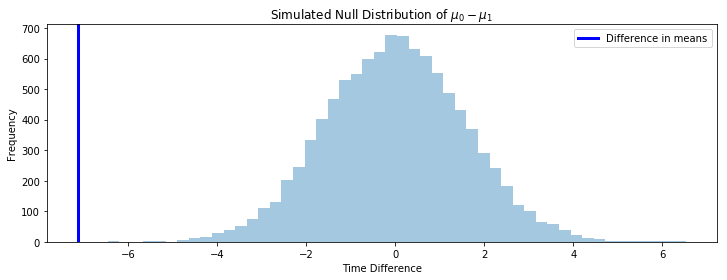

In [245]:
# Histogram of simulated normal null distribution
plt.figure(figsize=(12,4))
sns.distplot(null_vals,kde=False,norm_hist=False)
plt.axvline(u_diff,color='b',lw=3,label='Difference in means')
plt.title('Simulated Null Distribution of $\mu_0 - \mu_1$')
plt.xlabel('Time Difference')
plt.ylabel('Frequency')
plt.legend();

In [240]:
# Bootstrapping statistical test
print('Simulated test')
print('\nSimulated {} samples, Statistic (Diff mean): {:.4f}'.format(RESAMPLE, diff.mean())) 
print('Dataset Statistic(Diff mean): {:.4f}'.format(u_diff))

p_val = (null_vals < u_diff).mean()
print('pval: {:.20f}'.format(p_val))

Simulated test

Simulated 10000 samples, Statistic (Diff mean): -7.1832
Dataset Statistic(Diff mean): -7.1421
pval: 0.00000000000000000000


In [238]:
# Scipy statistical test (a-b)
sp_tstat, sp_pval = stats.ttest_ind(a=df_clean['Congruent'], b=df_clean['Incongruent'], equal_var=False)

print('Scipy\'s T-test\n Statistic(Diff mean): {:.4f}\n pvalue {:.10f}'.format(sp_tstat, sp_pval))


Scipy's T-test
 Statistic(Diff mean): -7.7461
 pvalue 0.0000000019


In both cases pval < 0.005 which was our $\alpha$ threshold for a Type I error

<a id="further"></a>
## Further Investigation

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

In [ ]:
#Kernel density estimation
g = sns.jointplot( x="Congruent", y="Incongruent", data=df_clean, kind="kde")
g.plot_joint(plt.scatter, c="w", s=40, linewidth=1, marker="^");

In [ ]:
# Normed Histogram of both groups
plt.figure(figsize=(10,5))

sns.distplot(df_clean["Congruent"],hist=True, kde=False, label = "Congruent")
sns.distplot(df_clean["Incongruent"], hist=True, kde=False, label = "Incongruent")
plt.axvline(df_clean['Congruent'].mean(),color='b',lw=4,label='Congruent mean')
plt.axvline(df_clean['Incongruent'].mean(),color='r',lw=4,label='Incongruent mean')
plt.xlabel('Time')
plt.ylabel('Normed Frequency')
plt.title('Normed Distributions of Stroop Tests')
plt.legend();


<a id="conclusions"></a>
## Conclusions

## References

[1] Statistics: The Science of Decisions Project Instructions:[https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)
